Load the dataset into the program and show a sample of the Pokemon images being classified.

Categories: 10


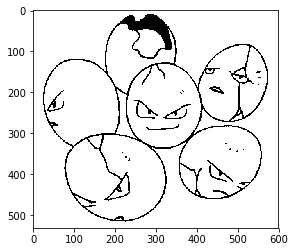

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pprint
import random

# Append with /Example/ folder to only use select pokemon to train on
# Example folder contains Abra, Aerodactyl, and Alakazam
DATADIR = '/Users/ericnunn/Desktop/SeattleU/Courses/CPSC5305/Pokemon Classifier/dataset/Example-10'

# all categories of Pokemon to train on
CATEGORIES = [x for x in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR,x))]
CATEGORIES.sort()
print('Categories:', len(CATEGORIES))


path = os.path.join(DATADIR, CATEGORIES[0])

img = cv2.imread(os.path.join(path, os.listdir(path)[1]), cv2.IMREAD_GRAYSCALE) # rgb colors are read in different order
plt.imshow(img, cmap='gray')
plt.show()


In [5]:
print(img.shape)

(532, 600)


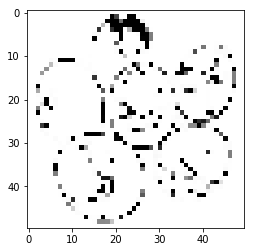

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)   # path to pokemon dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass

create_training_data()

In [8]:
print(len(training_data))

661


In [12]:
# shuffle dataset so the algorithm doesn't learn the Pokemon type based on order of appearance
random.shuffle(training_data)

In [13]:
# print label for first 10 pictures
for sample in training_data[:10]:
    print(sample[1])

2
2
3
6
3
4
7
3
8
0


In [14]:
X = []
y = []

In [15]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [16]:
import pickle

pickle_out = open('pickle_data/X_10_pokemon.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('pickle_data/y_10_pokemon.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open('X_10_pokemon.pickle', 'rb')
X = pickle.load(pickle_in)

In [18]:
print(y)

[2 2 3 6 3 4 7 3 8 0 4 9 0 7 8 1 2 3 1 6 5 3 5 8 6 1 0 9 9 0 7 5 1 3 9 3 1
 9 0 2 7 0 6 1 1 5 3 4 1 7 0 3 1 3 3 2 8 1 9 3 0 7 5 4 4 2 6 3 7 3 9 2 9 4
 3 4 2 4 9 4 0 9 8 3 7 0 6 4 6 3 7 3 3 1 7 1 7 1 9 3 4 1 2 5 9 0 7 7 2 6 9
 9 3 5 3 9 0 8 1 7 4 1 5 4 3 3 5 3 3 6 9 7 0 1 5 5 3 3 8 3 3 4 0 3 1 4 5 7
 9 9 1 5 6 3 3 8 0 8 3 8 6 1 4 7 7 3 6 9 9 6 5 0 8 1 6 1 0 8 3 1 8 3 7 8 4
 3 2 6 6 4 3 2 6 9 4 7 6 8 5 2 9 2 8 7 7 4 8 7 6 3 9 7 3 6 7 3 5 3 4 8 2 1
 6 0 3 1 7 2 6 2 2 4 2 7 1 4 6 7 2 7 1 4 9 5 4 7 1 8 3 5 2 5 3 8 2 1 1 0 1
 6 9 3 3 7 6 6 3 6 6 9 9 7 3 2 3 4 3 0 2 0 5 8 5 2 9 4 4 3 1 6 4 4 3 4 0 3
 7 3 2 1 4 3 8 0 9 9 3 9 9 3 1 0 3 9 9 8 5 5 2 9 1 6 9 7 6 3 2 3 1 2 9 0 4
 7 9 7 4 6 2 1 3 8 5 0 3 6 0 2 2 3 0 1 5 8 0 0 3 3 1 7 7 2 5 1 0 3 0 3 2 7
 8 6 4 2 4 3 2 3 3 1 6 5 0 1 8 3 3 1 9 7 0 3 7 8 3 6 3 5 8 4 6 9 8 2 4 4 8
 2 6 7 0 6 6 3 2 9 8 7 8 6 1 3 1 9 2 0 3 3 4 4 8 6 2 2 6 1 8 3 6 5 3 4 5 3
 4 4 0 4 9 8 9 9 0 3 3 2 3 7 1 2 0 3 0 3 8 3 8 1 3 2 4 3 2 5 2 7 0 8 0 2 9
 9 9 5 9 8 3 7 5 7 9 7 6 